## Example notebook for the AutoML pipeline
Load the data with one of the three imported datasets before running the AutoML function. These datasets are provided by sklearn and are very small and easy to learn. You can learn more about these datasets at https://scikit-learn.org/stable/datasets/index.html.
    
    load_breast_cancer: binary classification
    load_wine: multi-class classification
    load_boston: regression

Note: make sure automl.py is located in the same directory as the notebook!

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from automl import AutoML

In [2]:
# Load the data as pandas dataframes
x = load_breast_cancer()

data = np.c_[x.data, x.target]
columns = np.append(x.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
Y = data['target']

In [3]:
# Load the data as numpy arrays
#X, Y = load_breast_cancer(return_X_y=True)

Algorithm set to binary classification.
Models in pipeline: ['GNB', 'MNB', 'LogReg', 'LDA', 'QDA', 'KNN', 'Tree', 'ET', 'RF', 'AdaBoost', 'GBM', 'XGBoost', 'lSVM', 'kSVM', 'PA', 'SGD', 'MLP']

Data stats =====================>
Number of features: 30
Total number of instances: 569
Size of the training set: 426
Size of the validation set: 143

Parallel processing with 2 cores.


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:30<00:00,  1.52s/it]




Final stats ================>>
Target metric: F1
------------------------------------
Gaussian Naïve Bayes            --> Mean: 0.953   Std: 0.012
Multinomial Naïve Bayes         --> Mean: 0.922   Std: 0.012
Logistic Regression             --> Mean: 0.983   Std: 0.005
Linear Discriminant Analysis    --> Mean: 0.969   Std: 0.005
Quadratic Discriminant Analysis --> Mean: 0.968   Std: 0.010
K-Nearest Neighbors             --> Mean: 0.972   Std: 0.007
Decision Tree                   --> Mean: 0.949   Std: 0.014
Extremely Randomized Trees      --> Mean: 0.972   Std: 0.012
Random Forest                   --> Mean: 0.953   Std: 0.010
Adaptive Boosting               --> Mean: 0.972   Std: 0.013
Gradient Boosting Machine       --> Mean: 0.967   Std: 0.021
Extreme Gradient Boosting       --> Mean: 0.971   Std: 0.016
Linear Support Vector Machine   --> Mean: 0.963   Std: 0.016
Kernel Support Vector Machine   --> Mean: 0.981   Std: 0.010
Passive Aggressive              --> Mean: 0.956   Std: 0.0

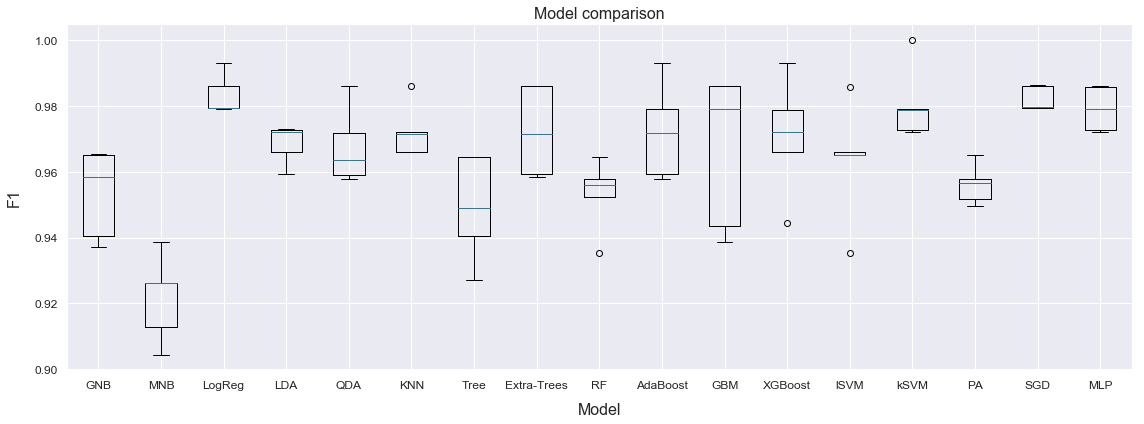

In [4]:
# Run AutoML pipeline
models = AutoML(X, Y,
                metric="f1",
                percentage=100,
                ratio=0.25,
                max_iter=5,
                batch_size=1,
                cv=True,
                n_splits=5,
                n_jobs=2,
                save_plot='boxplot.png',
                verbose=2)

In [5]:
models['MNB'].best_params

{'alpha': 1.0, 'fit_prior': True}

In [6]:
models['GNB'].best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
models['LogReg'].Precision()

0.9775280898876404

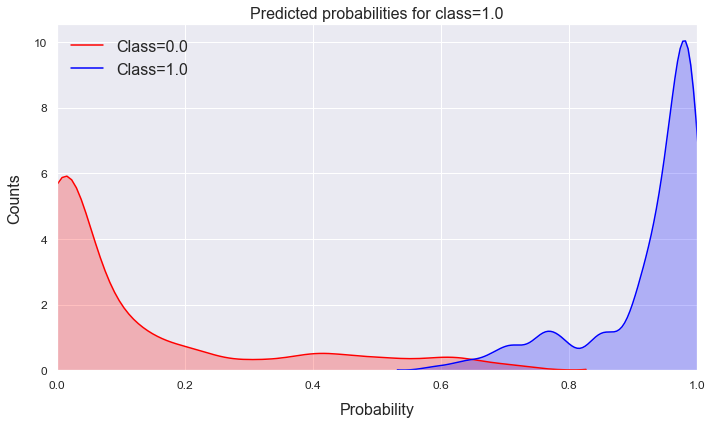

In [14]:
models['lSVM'].plot_proba()

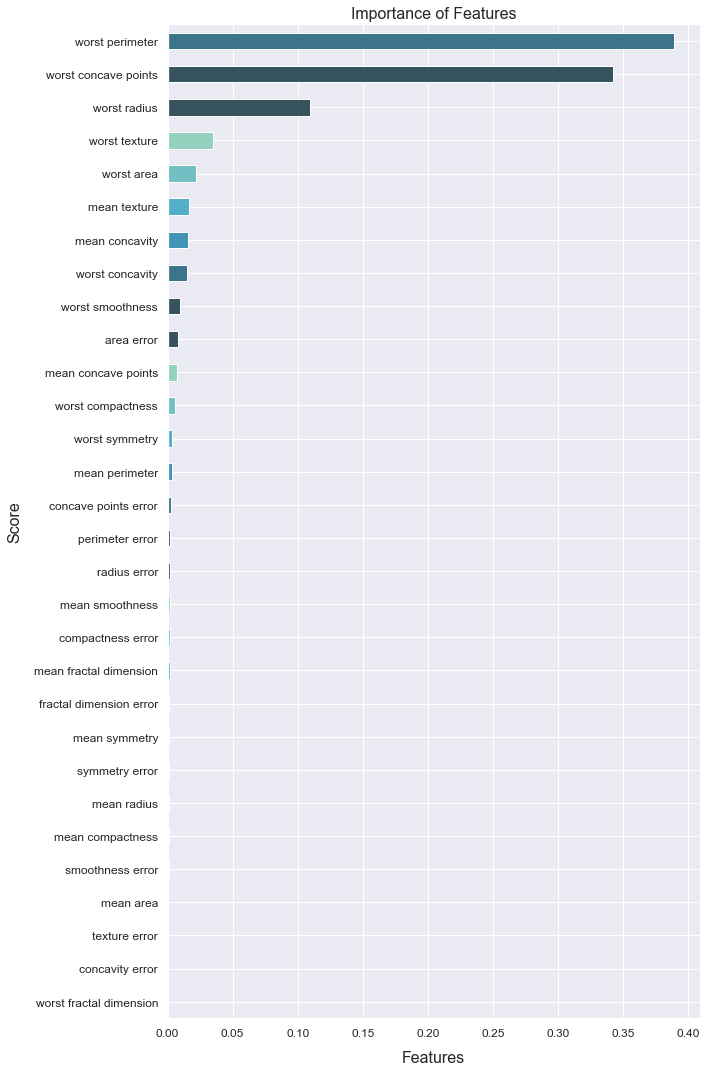

In [9]:
models['RF'].plot_feature_importance()

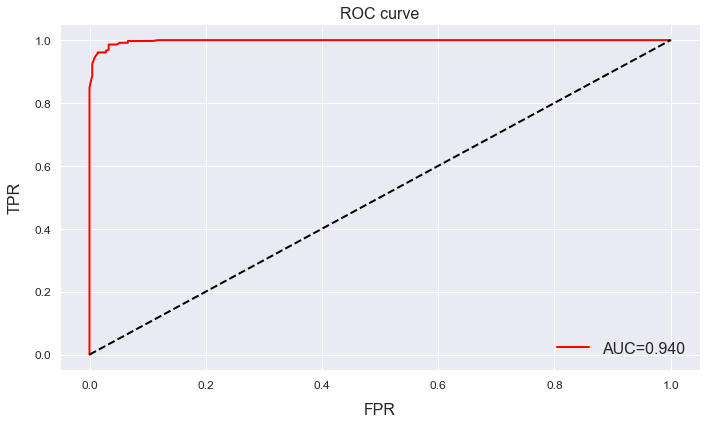

In [10]:
models['KNN'].plot_ROC()

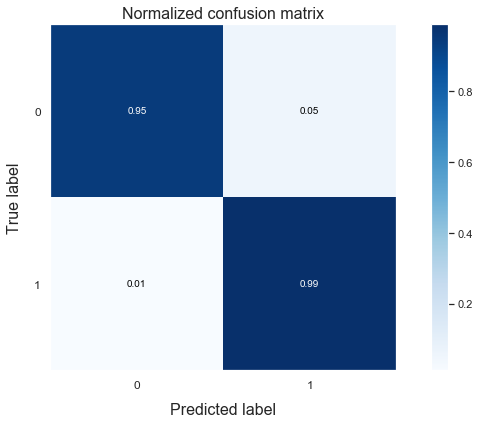

In [11]:
models['RF'].plot_confusion_matrix()

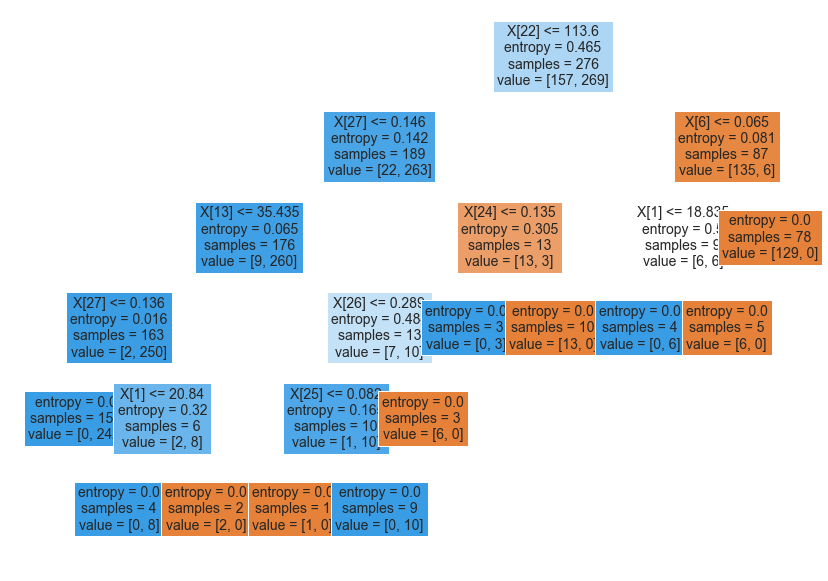

In [16]:
models['RF'].plot_decision_tree(0, rotate=False)